**Danish Sheikh**

**C2 - 36**

The purpose of this project is to develop a machine learning model capable of accurately classifying breast tumors as either benign or malignant. This classification task leverages the Breast Cancer Wisconsin Dataset, a widely recognized resource in medical diagnostics. The dataset contains 569 instances, each characterized by 30 features derived from digitized images of fine needle aspirates (FNA) of breast masses. These features include measurements such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

The primary objectives of this project are:

- To implement four distinct classification algorithms: Logistic Regression, Decision Tree, Random    Forest, and Support Vector Machine (SVM).
- To evaluate the performance of these models using a range of metrics.
- To determine the most effective model for this medical diagnostic task, with a focus on its applicability in real-world scenarios.

A key emphasis is placed on achieving high recall, as correctly identifying malignant cases (minimizing false negatives) is critical in medical diagnostics.


In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()
X = data.data  # Features (569 instances, 30 features)
y = data.target  # Target variable (0 = malignant, 1 = benign)
feature_names = data.feature_names

# Convert to DataFrame for exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Adjust target for medical intuition: 1 = malignant, 0 = benign
y = 1 - y  # Invert labels
df['target'] = y

In [5]:
print(df['target'].value_counts())

target
0    357
1    212
Name: count, dtype: int64


In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [7]:
print(df.isnull().sum().sum())  # Output: 0

0


In [8]:
corr_with_target = df.corr()['target'].sort_values(ascending=False)
print(corr_with_target.head())  # Top correlated features

target                  1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
Name: target, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)  # Apply to test data

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

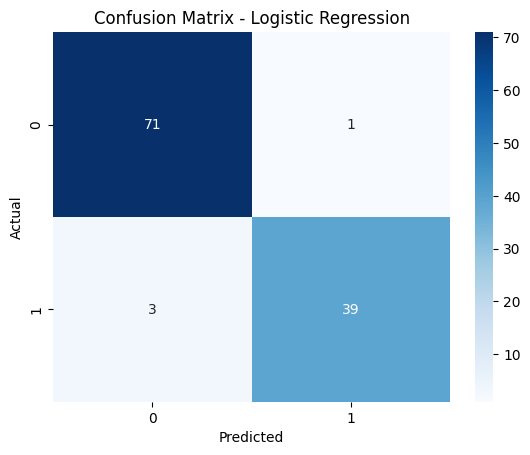

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_log_reg],
    'Precision': [precision_log_reg],
    'Recall': [recall_log_reg],
    'F1-Score': [f1_log_reg]
})
print(results.round(3))

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     0.965      0.975   0.929     0.951
